# Project M16 - California Housing Dataset

Objecttive - To develop a ML model to predict housing prices in california, based on provided details

Approach - Since prices are a continous variable, building a Regression model will be a suitable approach

# Importing Required Libraries

In [2]:
# Importing libs
import numpy as np
import pandas as pd

# Importing/Loading dataset

In [3]:
# Loading dataset
cal_hs = pd.read_csv('housing.csv')

In [4]:
cal_hs.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cal_hs.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1224,-120.57,38.20,13.0,4110.0,847.0,1796.0,706.0,2.6417,122300.0,INLAND
7014,-118.08,33.97,36.0,1620.0,298.0,1258.0,309.0,3.9773,166700.0,<1H OCEAN
15432,-117.25,33.20,22.0,2361.0,618.0,1472.0,596.0,2.0625,124500.0,<1H OCEAN
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333,127900.0,INLAND
16904,-122.35,37.58,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,345000.0,NEAR OCEAN


# Data Preparation/Analysis/Preprocessing

In [6]:
cal_hs.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
cal_hs.shape

(20640, 10)

In [8]:
# Encoding 'Ocean_proximity column'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cal_hs['ocean_proximity'] = le.fit_transform(cal_hs['ocean_proximity'])

In [9]:
cal_hs['ocean_proximity'].unique() # To check differnt values assigned during encoding

array([3, 0, 1, 4, 2])

In [10]:
cal_hs.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [11]:
# Statistical Summary
cal_hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [12]:
# To caheck Null values & datatype
cal_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [13]:
cal_hs.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
# Check skewness
cal_hs.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [15]:
# Significant skewness is present in 7 columns

In [16]:
#droping rows NaN values
cal_hs.dropna(axis = 0, inplace = True)

# VISUALIZATION

Univeriate analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

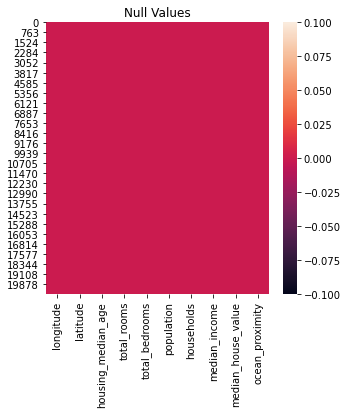

In [18]:
plt.figure(figsize = (5,5))
plt.title('Null Values')
sns.heatmap(cal_hs.isnull())
plt.show()

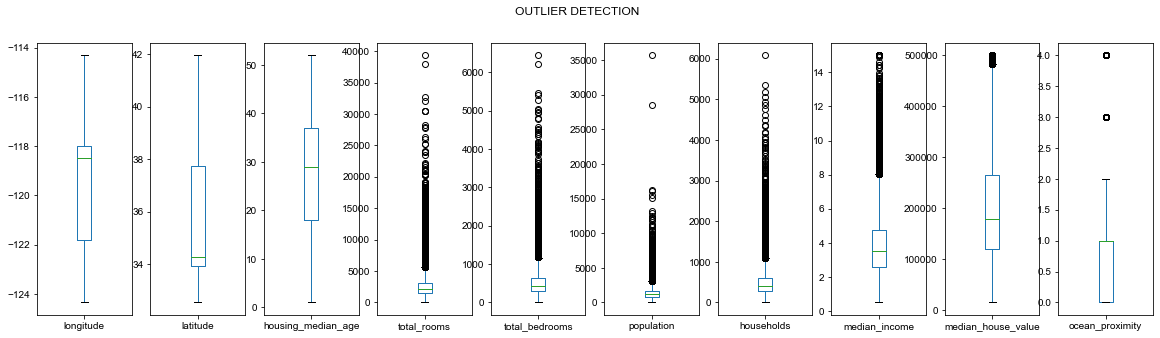

In [19]:
cal_hs.plot(kind = 'box', subplots = True ,figsize = (20,5), layout = (1,10), title = "OUTLIER DETECTION" )
sns.set_style('darkgrid')
plt.show()

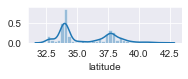

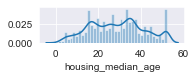

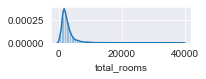

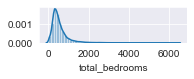

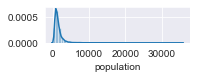

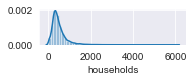

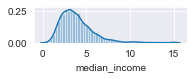

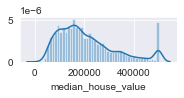

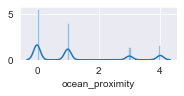

In [20]:
collist = cal_hs.columns.values
for i in range (1,len(collist)):
    plt.figure(figsize = (5,5))
    plt.subplot(5,2,i+1)
    sns.distplot(cal_hs[collist[i]])
    plt.tight_layout()

In [21]:
cor_cal_hs = cal_hs.corr() 

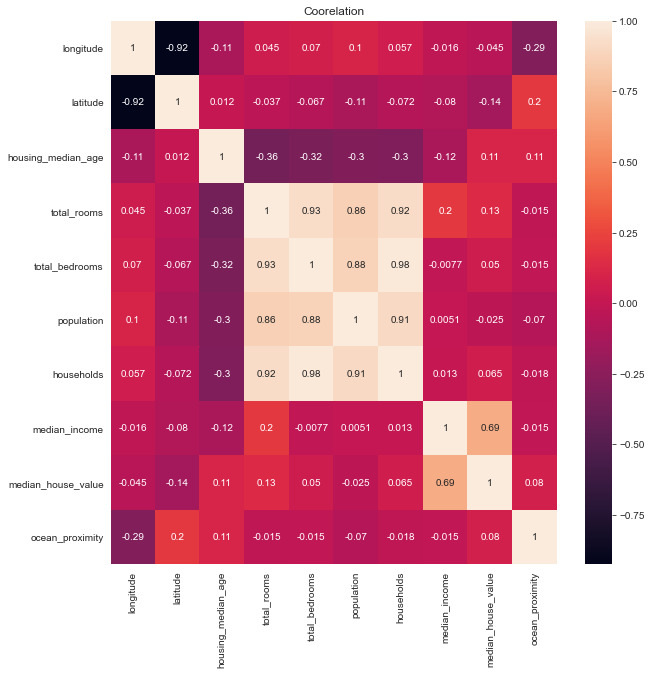

In [22]:
plt.figure(figsize = (10,10))
plt.title('Coorelation')
sns.heatmap(cor_cal_hs, annot = True)
sns.color_palette("Set2")
plt.show()

In [23]:
import scipy
from scipy.stats import zscore
z = np.abs(zscore(cal_hs))
threshold = 3
new_cal_hs = cal_hs[(z<3).all(axis=1)]

In [24]:
new_cal_hs.shape

(19549, 10)

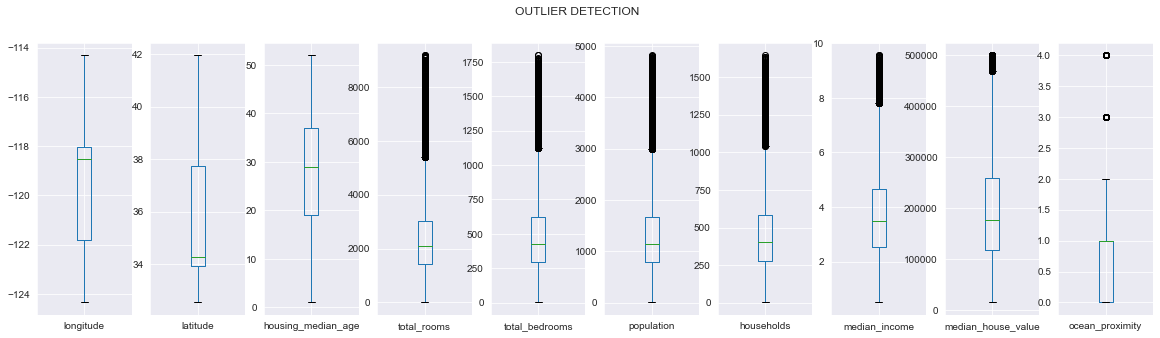

In [25]:
new_cal_hs.plot(kind = 'box', subplots = True ,figsize = (20,5), layout = (1,10), title = "OUTLIER DETECTION" )
sns.set_style('darkgrid')
plt.show()

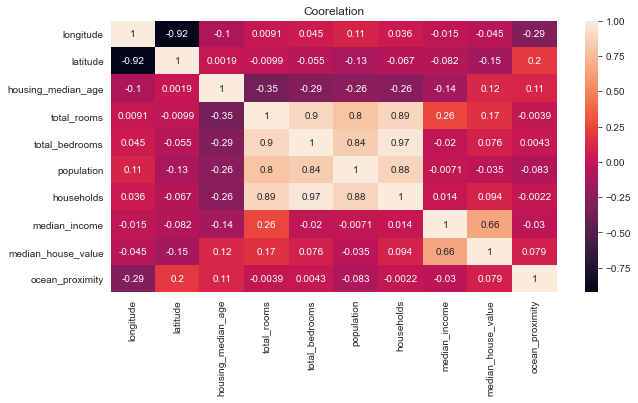

In [26]:
plt.figure(figsize = (10,5))
plt.title('Coorelation')
sns.heatmap(new_cal_hs.corr(), annot = True)
sns.color_palette("Set2")
plt.show()

# Building Model

In [27]:
y = cal_hs['median_house_value']
x = cal_hs.drop(['median_house_value'],axis = 1)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.model_selection import train_test_split
ssc = StandardScaler()
x = ssc.fit_transform(x)
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [29]:
x.shape

(20433, 9)

In [30]:
y.shape

(20433,)

In [31]:
# To find the best random state
best_r_state = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = r2_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 66.6927433506821% best random state is 159


In [32]:
model = [LinearRegression(), AdaBoostRegressor(), RandomForestRegressor()]
for m in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 159)
    m.fit(x_train,y_train)
    predlr = m.predict(x_test)
    print(f'For algorithm {m} r2 score is= {r2_score(y_test,predlr)}')
    print(f'For algorithm {m} Mean Sq. Error = {mean_squared_error(y_test,predlr)}')
    print(f'For algorithm {m} Mean abs. Error = {mean_absolute_error(y_test,predlr)}')
    cvscore = cross_val_score(m,x,y,cv =5).mean()
    print(f'For algorithm {m} cv score is = {cvscore}')

For algorithm LinearRegression() r2 score is= 0.6669274335068209
For algorithm LinearRegression() Mean Sq. Error = 4612185085.514137
For algorithm LinearRegression() Mean abs. Error = 50005.96797346222
For algorithm LinearRegression() cv score is = 0.5833636458165129
For algorithm AdaBoostRegressor() r2 score is= 0.3773007792881947
For algorithm AdaBoostRegressor() Mean Sq. Error = 8622757763.470982
For algorithm AdaBoostRegressor() Mean abs. Error = 81129.4878153503
For algorithm AdaBoostRegressor() cv score is = 0.2575592643307333
For algorithm RandomForestRegressor() r2 score is= 0.8202504778502098
For algorithm RandomForestRegressor() Mean Sq. Error = 2489061389.5832024
For algorithm RandomForestRegressor() Mean abs. Error = 32271.98034252669
For algorithm RandomForestRegressor() cv score is = 0.4887941704892551


In [33]:
# Developing model with best parameters
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 159)
rf = RandomForestRegressor(criterion= 'mse', n_estimators= 100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
print('R2 Score is = ',r2_score(y_test,rfpred)*100)
print('Mean Sq. Error = ',mean_squared_error(y_test,rfpred))
print('Mean abs. Error = ',mean_absolute_error(y_test,rfpred))
cvscore = cross_val_score(rf,x,y,cv =5).mean()
print('cv score is =',cvscore)

R2 Score is =  82.07412006079124
Mean Sq. Error =  2482266161.119841
Mean abs. Error =  32113.884519572955
cv score is = 0.4918822575582267


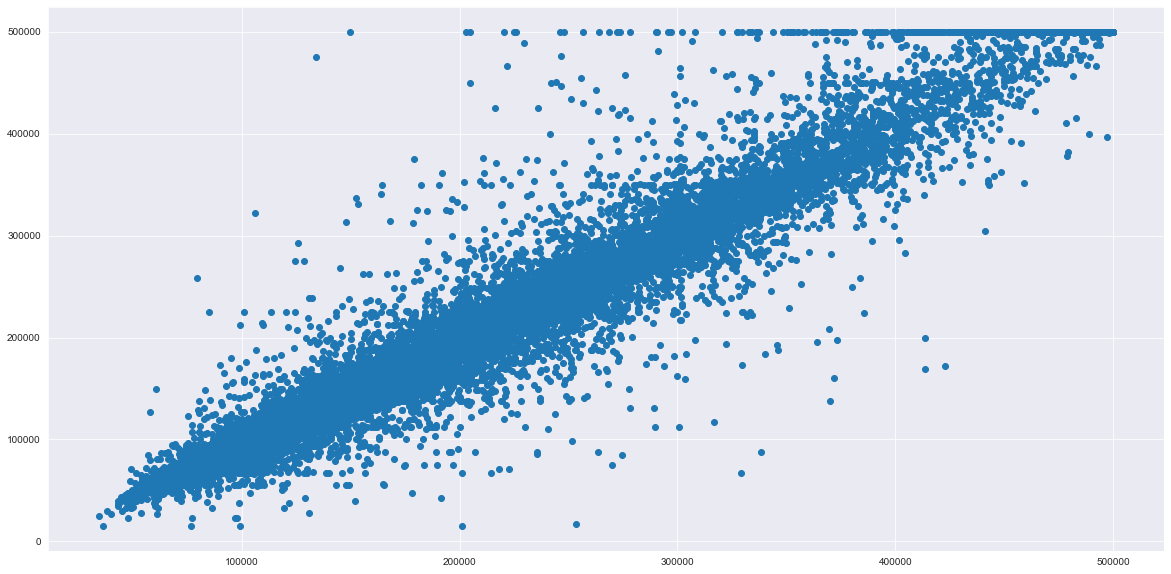

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(rf.predict(x),y, cmap='viridis')
plt.show()

# Saving the model

In [36]:
import joblib

In [37]:
joblib.dump(rf,"Project_m16_california_ Housing.pkl")

['Project_m16_california_ Housing.pkl']

In [38]:
joblib.load("Project_m16_california_ Housing.pkl")

RandomForestRegressor()